# ACM30130 Assignment 2

**Due 5PM Friday 4th October 2024**

In this assignment, we will use the shooting method to study a problem in astrophysics

## Stellar structure in astrophysics

### Equations of stellar structure

Astrophysical stars are very complicated objects. We can produce a relatively simple model for a star by assuming spherical symmetry and using the equations of [stellar structure](https://en.wikipedia.org/wiki/Stellar_structure) which describe how the mass $m(r)$, temperature $T(r)$, pressure $P(r)$, and luminosity $l(r)$ vary with radius $r$ from the centre of the star. With an appropriate choice of units, the equations are given by:

\begin{align}
\frac{\mathrm{d}m}{\mathrm{d}r} &= 4\pi r^2 \rho, &
\frac{\mathrm{d}P}{\mathrm{d}r} &=-\frac{m \rho}{r^2}, \\
\frac{\mathrm{d}l}{\mathrm{d}r} &= 4\pi r^2 \rho \varepsilon, &
\frac{\mathrm{d}T}{\mathrm{d}r} &= -\frac{3\rho l}{16 \pi r^2 T^3}.
\end{align}

These are supplemented by equations for the energy generation rate per unit mass
$$
\varepsilon=\rho T^4 ,
$$
and the density
$$
\rho=P/T.
$$

### Stellar structure as a boundary value problem

This is a boundary value problem: we have boundary conditions at the surface ($r=R$) and at the centre ($r=0$) of the star:

- $m(0)=0$ &nbsp; *There is no mass inside the centre of the star*;
- $l(0)=0$ &nbsp; *Luminosity is zero at the centre*;
- $P(R)=0$ &nbsp; *The surface pressure is zero*;
- $T(R)=T_\mathrm{eff}$ &nbsp; *The surface temperature is a known value, the 'effective temperature' of the star*.

The remaining boundary values ($m(R)$, $l(R)$, $T(0)$, $P(0)$) are determined by consistently solving the equations.

It is normally more convenient to rewrite these equations so that $m$ is the independent variable instead of $r$. Defining the total mass as $M$, the unknown boundary values are now the radius of the star $R=r(M)$, the luminosity of the star $l(M)$, and the temperature and pressure at the centre $T(0)$ and $P(0)$.

### Irregularity of the equations at the origin ($r=0$)

Note that the equations for $P$ and $T$ involve division by $r$, so we won't be able to directly impose the boundary conditions exactly at the centre.
To get around this, we can derive approximate boundary conditions for points close to the centre using an *asymptotic expansion*.
We will focus more on how to use this technique later in the course, but for now you can take the following expressions as given:
\begin{align}
r(m) &\approx \left(\frac{3mT(0)}{4\pi P(0)}\right)^{1/3}, \\
l(m) &\approx m P(0) T(0)^3 , \\
T(m) &\approx T(0) - \left(\frac{3m}{\pi}\right)^{2/3} \frac{P(0)^{7/3} T(0)^{-4/3}}{2^{13/3}} , \\
P(m) &\approx P(0) - \left(\frac{\pi}{6}\right)^{1/3} \left(\frac{P(0)}{T(0)}\right)^{4/3} m^{2/3} .
\end{align}

## Solving the equations of stellar structure

In this assignment, you are required to solve the equations of stellar structure with Python.

1. Solve the boundary value problem using the methods we learned in class using the following steps:
    1. Rewrite the equations so that $m$ is the independent variable instead of $r$ (either using Mathematica or by hand)
    2. Define functions to integrate from near the centre outwards and from the surface inwards given initial conditions for $r$, $P$, $l$, and $T$.
    3. Set up a shooting method in which the two integrations are matched at a midpoint inside the star.
2. Test your code in the case of a solar mass star ($M=1$), matching at $m=0.5$, using boundary conditions $r(0)=0$, $l(0)=0$, $P(M)=10^{-4}$, and $T(M)=0.01$. Use the following as an initial guess for the unknown boundary values: $P(0)=2.4$, $T(0)=0.7$, $l(M)=0.15$, $r(M)=0.9$.
3. Convert the results to physical units using the conversions
\begin{align}
M_{\rm physical}    &= M_{\rm code} \times 1.989 \times 10^{30}\ \mathrm{kg},\\
r_{\rm physical}    &= r_{\rm code} \times 4.4199976 \times 10^{8}\ \mathrm{m},\\
P_{\rm physical}    &= P_{\rm code} \times 6.9167576 \times 10^{15}\ \mathrm{Pa},\\
\rho_{\rm physical} &= \rho_{\rm code} \times 23033.964\ \mathrm{kg\ m^{-3}},\\
T_{\rm physical}    &= T_{\rm code} \times 22030736\ \mathrm{K},\\
l_{\rm physical}    &= l_{\rm code} \times 1.0252815 \times 10^{28}\ \mathrm{W}.
\end{align}
4. Plot the resulting solutions.

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import root
import matplotlib.pyplot as plt

In [2]:
def stellar_structure(m, u):
    r, P, l, T = u

    dr_dm = T / (4 * np.pi * r**2 * P)
    dP_dm = -m / (4 * np.pi * r**4)
    dl_dm = P * T**4
    dT_dm = (-3 * l) / (64 * np.pi**2 * r**4 * T**3)
    
    return [dr_dm, dP_dm, dl_dm, dT_dm]

In [3]:
# Calculation of values of approximations of irregualtity at the origin

approx_r0 = ((3*0.7*10e-5)/(4*np.pi*2.4))**(1/3)
approx_l0 = 10e-5*2.4*0.7**3
approx_Tm = 0.7 - (3*10e-5/np.pi)**(2/3)*((2.4**(7/3)*0.7**(-4/3))/(2**(13/3)))
approx_Pm = 2.4 - (np.pi/6)**(1/3)*(2.4/0.7)**(4/3)*10e-5**(2/3)

In [4]:
def ShootInwards(rM, lM):
    return solve_ivp(stellar_structure, [1, 0.5], [rM, 10**(-4), lM, 0.01], dense_output=True)

In [5]:
def ShootOutwards(P0, T0):
    return solve_ivp(stellar_structure, [0, 0.5], [approx_r0, P0, approx_l0, T0], dense_output=True)

In [6]:
# Calculation of values of approximations of irregualtity at the origin

approx_rm = ((3*0.7*10e-5)/(4*np.pi*2.4))**(1/3)
approx_lm = 10e-5*2.4*0.7**3
approx_Tm = 0.7 - (3*10e-5/np.pi)**(2/3)*((2.4**(7/3)*0.7**(-4/3))/(2**(13/3)))
approx_Pm = 2.4 - (np.pi/6)**(1/3)*(2.4/0.7)**(4/3)*10e-5**(2/3)

In [7]:
def ShootingMethod(guess):
    #r, P, l, T = u
    
    solin = ShootInwards(guess[0], guess[2])
    solout = ShootOutwards(guess[1], guess[3])

    return [np.abs(solout.y[0][-1] - solin.y[0][-1]), 
        np.abs(solout.y[1][-1] - solin.y[1][-1]),
        np.abs(solout.y[2][-1] - solin.y[2][-1]),
        np.abs(solout.y[3][-1] - solin.y[3][-1])]
    

In [8]:
guesses = [0.9, approx_Pm, 0.15, approx_Tm]
root_values = root(ShootingMethod, guesses)
print(root_values)

 message: The solution converged.
 success: True
  status: 1
     fun: [ 9.992e-16  5.773e-15  2.498e-16  8.327e-16]
       x: [ 8.631e-01  3.161e+00  1.052e-01  7.865e-01]
  method: hybr
    nfev: 58
    fjac: [[-1.445e-01 -9.774e-01 -4.505e-03 -1.544e-01]
           [ 2.513e-01  1.128e-01  1.257e-01 -9.531e-01]
           [ 5.180e-01 -7.506e-02 -8.520e-01  1.530e-02]
           [-8.048e-01  1.624e-01 -5.083e-01 -2.601e-01]]
       r: [ 3.432e+00 -5.793e-01 -5.680e+00  3.081e+00 -6.621e-01
           -9.707e-01  8.707e-01  1.019e+00 -4.705e-01 -5.570e-01]
     qtf: [-4.138e-13 -2.588e-14 -3.404e-14  2.147e-14]


In [9]:
#r, P, l, T = u

m_conv = 1.989 *10**(30)
rad_conv = 4.4199976 * 10**8
pres_conv = 6.9167576 * 10**(15)
lum_conv = 1.0252815 *10**28
temp_conv = 22030736

In [10]:
solin = ShootInwards(root_values.x[0], root_values.x[2])
solout = ShootOutwards(root_values.x[1], root_values.x[3])

In [11]:
m_in = np.linspace(1, 0.5, 101)
m_out = np.linspace(0, 0.5, 101)

m_in_scaled = m_in * m_conv
m_out_scaled = m_out * m_conv

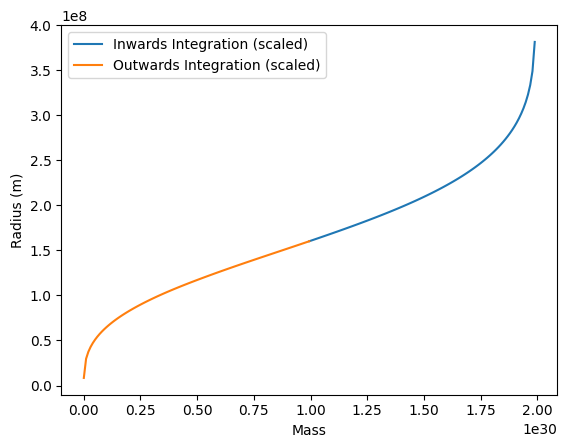

In [12]:
solin_values = solin.sol(m_in)[0]
solout_values = solout.sol(m_out)[0]

# Scale the values
solin_scaled = solin_values * rad_conv
solout_scaled = solout_values * rad_conv


plt.plot(m_in_scaled, solin_scaled, label='Inwards Integration (scaled)')
plt.plot(m_out_scaled, solout_scaled, label='Outwards Integration (scaled)')
plt.xlabel('Mass')
plt.ylabel('Radius (m)')
plt.legend()
plt.show()

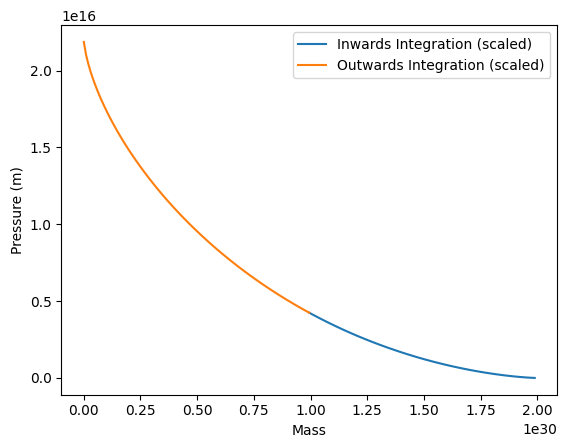

In [13]:
solin_values = solin.sol(m_in)[1]
solout_values = solout.sol(m_out)[1]

# Scale the values
solin_scaled = solin_values * pres_conv
solout_scaled = solout_values * pres_conv


plt.plot(m_in_scaled, solin_scaled, label='Inwards Integration (scaled)')
plt.plot(m_out_scaled, solout_scaled, label='Outwards Integration (scaled)')
plt.xlabel('Mass')
plt.ylabel('Pressure (m)')
plt.legend()
plt.show()

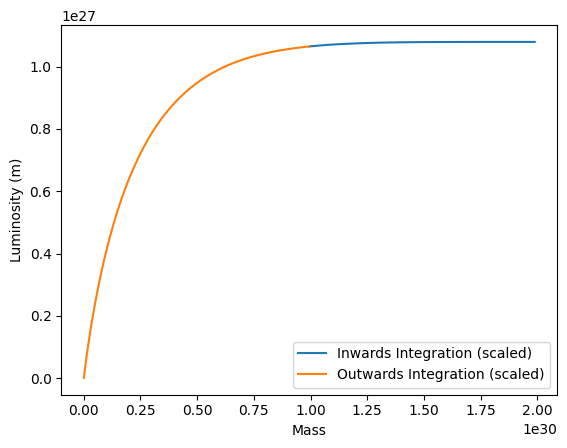

In [14]:
solin_values = solin.sol(m_in)[2]
solout_values = solout.sol(m_out)[2]

# Scale the values
solin_scaled = solin_values * lum_conv
solout_scaled = solout_values * lum_conv


plt.plot(m_in_scaled, solin_scaled, label='Inwards Integration (scaled)')
plt.plot(m_out_scaled, solout_scaled, label='Outwards Integration (scaled)')
plt.xlabel('Mass')
plt.ylabel('Luminosity (m)')
plt.legend()
plt.show()

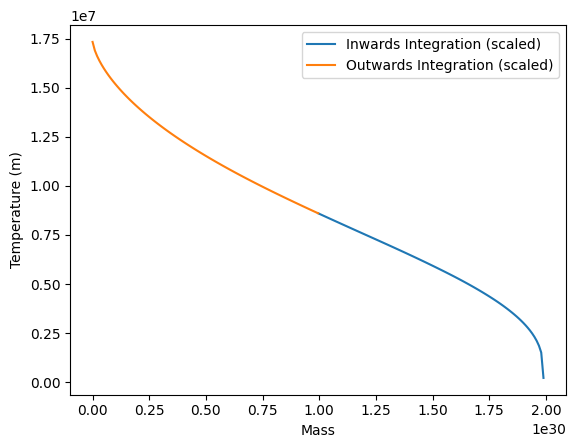

In [15]:
solin_values = solin.sol(m_in)[3]
solout_values = solout.sol(m_out)[3]

# Scale the values
solin_scaled = solin_values * temp_conv
solout_scaled = solout_values * temp_conv


plt.plot(m_in_scaled, solin_scaled, label='Inwards Integration (scaled)')
plt.plot(m_out_scaled, solout_scaled, label='Outwards Integration (scaled)')
plt.xlabel('Mass')
plt.ylabel('Temperature (m)')
plt.legend()
plt.show()